# **Import Required Libraries**

In [13]:
# change directory to root
import sys
from pathlib import Path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# import libraries
from src import utils
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

# **Deserialize Data**

In [14]:
# deserialize preprocessed X train and y train data
X_train_prep = utils.deserialize_data(path=project_root/'data'/'processed'/'X_train_prep.pkl')
y_train_prep = utils.deserialize_data(path=project_root/'data'/'processed'/'y_train_prep.pkl')

Load object. . .
/home/bagaskoroah/ml_process/BAGAS_MLPROCESS/data/processed/X_train_prep.pkl has been successfully loaded!.
Load object. . .
/home/bagaskoroah/ml_process/BAGAS_MLPROCESS/data/processed/y_train_prep.pkl has been successfully loaded!.


In [15]:
# sanity check X_train_prep
X_train_prep

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_onfile_N,default_onfile_Y
15884,25,241875,4.0,16000,7.05,0.07,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15138,21,18000,5.0,1500,12.18,0.08,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7474,25,53000,10.0,16000,12.53,0.30,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18212,28,16800,4.0,5000,13.98,0.30,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6493,25,50000,2.0,10000,7.90,0.20,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14621,25,98000,9.0,25000,16.45,0.26,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18736,30,65000,0.0,16000,13.06,0.25,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1663,22,20000,7.0,1675,7.74,0.08,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18257,29,110000,4.0,24000,18.39,0.22,8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
# sanity check y_train_prep
y_train_prep

15884    0
15138    1
7474     0
18212    1
6493     0
        ..
14621    1
18736    0
1663     0
18257    0
17068    1
Name: loan_status, Length: 25968, dtype: int64

In [17]:
# create ROS instance
ros = RandomOverSampler()

<Axes: xlabel='loan_status', ylabel='count'>

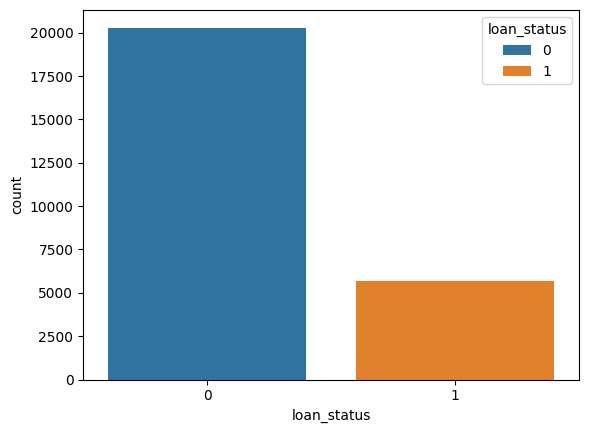

In [20]:
# countplot before oversampling
sns.countplot(
    data=y_train_prep.to_frame(),
    x='loan_status',
    hue='loan_status'
)

In [21]:
# generate proportion as well
y_train_prep.value_counts(normalize=True)

loan_status
0    0.781385
1    0.218615
Name: proportion, dtype: float64

In [22]:
# do the oversampling
X_train_ros, y_train_ros = ros.fit_resample(X=X_train_prep, y=y_train_prep)

<Axes: xlabel='loan_status', ylabel='count'>

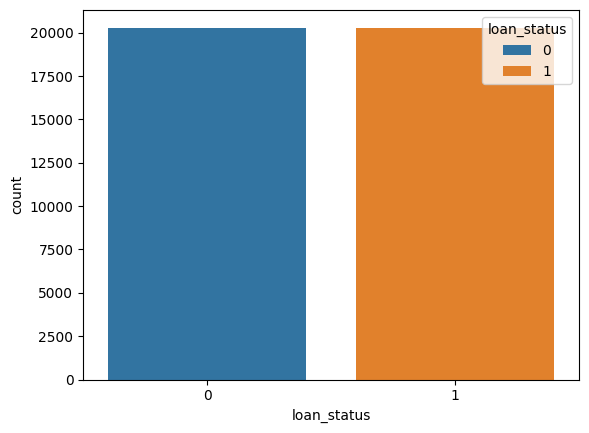

In [23]:
# generate countplot after oversampling
sns.countplot(
    data=y_train_ros.to_frame(),
    x='loan_status',
    hue='loan_status'
)

In [24]:
# generate the proportion as well
y_train_ros.value_counts(normalize=True)

loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64

## **Serialize After Resampling**

In [26]:
# save X_train_ros
utils.serialize_data(data=X_train_ros, path=project_root/'data'/'processed'/'X_train_ros.pkl')

# save y_train_ros
utils.serialize_data(data=y_train_ros, path=project_root/'data'/'processed'/'y_train_ros.pkl')

Saving object. . .
Your object has been successfully saved and stored into: /home/bagaskoroah/ml_process/BAGAS_MLPROCESS/data/processed/X_train_ros.pkl

Saving object. . .
Your object has been successfully saved and stored into: /home/bagaskoroah/ml_process/BAGAS_MLPROCESS/data/processed/y_train_ros.pkl

